In [11]:
## import libraries as we go along that will be necessary

import h5py
import numpy as np
import matplotlib.pyplot as plt

In [12]:
### defining class for reading the given data from HDF5 file with Coordinates, Masses, and Velocities

particle_type = 1  ## setting to DM particles for now; star particles are 4

class ReadData:
    def __init__(self, filename):
        self.filename = filename
        self.file = h5py.File(self.filename, 'r')
        self.coords = self.file['PartType{}'.format(particle_type)]['Coordinates'][:,:3]
        self.masses = self.file['PartType{}'.format(particle_type)]['Masses'][:]
        self.velocities = self.file['PartType{}'.format(particle_type)]['Velocities'][:]
        self.file.close()

    def get_coords(self):
        return self.coords

    def get_masses(self):
        return self.masses

    def get_velocities(self):
        return self.velocities

    def get_filename(self):
        return self.filename

    def get_file(self):
        return self.file

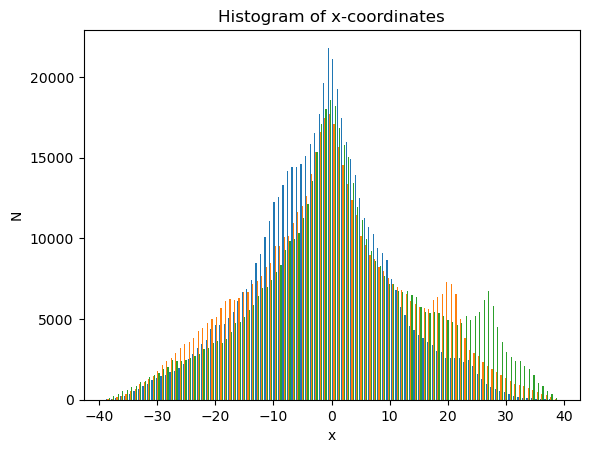

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


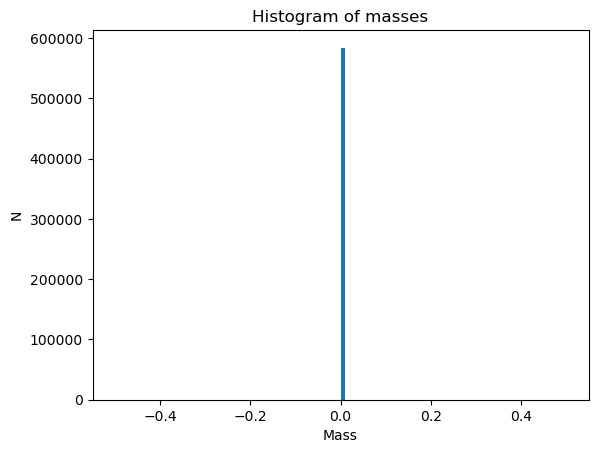

In [14]:
### using the class to read current directory and snapshot files

filename = 'examples/failed-galaxy/snapshot_000.hdf5'
data = ReadData(filename)
coords = data.get_coords()
masses = data.get_masses()
velocities = data.get_velocities()
file = data.get_file()

### plotting the data

plt.figure()
plt.hist(coords, bins=100)
plt.xlabel('x')
plt.ylabel('N')
plt.title('Histogram of x-coordinates')
plt.show()
plt.legend()
plt.close()

plt.figure()
plt.hist(masses, bins=100)
plt.xlabel('Mass')
plt.ylabel('N')
plt.title('Histogram of masses')
plt.show()
plt.close()

